<a href="https://colab.research.google.com/github/imsunbow/Algorithm/blob/main/%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC%E1%84%83%E1%85%A2%E1%84%89%E1%85%AE_%E1%84%8B%E1%85%B5%E1%86%B8%E1%84%86%E1%85%AE%E1%86%AB_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 다음 함수 DFT, IDFT를 완성하고, 이를 이용하여 벡터 d를 이산 퓨리에 변환한 다음, 다시 역 이산 퓨리에 변환을 하여라

/ 이산 퓨리에 변환의 식은 다음과 같다.

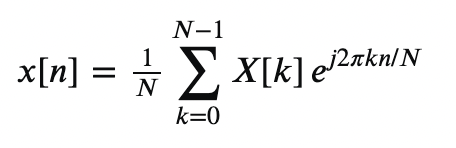

벡터
d =  [1,
      0,
      2,
      1,]
이다.


In [ ]:
import numpy as np

def DFT(x):
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

def IDFT(x):
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N) / N
    return np.dot(M, x)


2. 다음 행렬 A, B, C에 대하여, 그람-슈미트 과정을 통해 직교기저를 구하라. 또한 행렬 C를 QR 분해 하여라


A = [[3,1],[2,2]] , B = [[1,1,0],[1,3,1],[2,-1,1]], C = [[1,1,1],[2,2,0],[3,0,0],[0,0,1]]

In [ ]:
import numpy as np

def pprint(msg, A):
    print("---", msg, "---")
    (n, m) = A.shape
    for i in range(n):
        line = ""
        for j in range(m):
            line += "{0:.2f}\t".format(A[i, j])
        print(line)
    print("")

def gramSchmidt(A):
    (n, m) = A.shape
    Q = np.zeros((n, m))
    for j in range(m):
        q = A[:, j]
        for i in range(j):
            q = q - np.dot(Q[:, i], A[:, j]) * Q[:, i]
        q = q / np.linalg.norm(q)
        Q[:, j] = q
    return Q

# Matrices A, B, and C
A = np.array([[3, 1], [2, 2]])
B = np.array([[1, 1, 0], [1, 3, 1], [2, -1, 1]])
C = np.array([[1, 1, 1], [2, 2, 0], [3, 0, 0], [0, 0, 1]])

# Applying Gram-Schmidt process
print("그람-슈미트 과정을 이용한 직교기저 \n")

pprint("열벡터 A", A)
pprint("직교기저 A", gramSchmidt(A))

pprint("열벡터 B", B)
pprint("직교기저 B", gramSchmidt(B))

pprint("열벡터 C", C)
pprint("직교기저 C", gramSchmidt(C))

# QR decomposition of C
print("\n QR 분해\n")
Q, R = np.linalg.qr(C)
pprint("Q", Q)
pprint("R", R)


그람-슈미트 과정을 이용한 직교기저 

--- 열벡터 A ---
3.00	1.00	
2.00	2.00	

--- 직교기저 A ---
0.83	-0.55	
0.55	0.83	

--- 열벡터 B ---
1.00	1.00	0.00	
1.00	3.00	1.00	
2.00	-1.00	1.00	

--- 직교기저 B ---
0.41	0.21	-0.89	
0.41	0.83	0.38	
0.82	-0.52	0.25	

--- 열벡터 C ---
1.00	1.00	1.00	
2.00	2.00	0.00	
3.00	0.00	0.00	
0.00	0.00	1.00	

--- 직교기저 C ---
0.27	0.36	0.60	
0.53	0.72	-0.30	
0.80	-0.60	0.00	
0.00	0.00	0.75	


 QR 분해

--- Q ---
-0.27	-0.36	0.60	
-0.53	-0.72	-0.30	
-0.80	0.60	0.00	
-0.00	-0.00	0.75	

--- R ---
-3.74	-1.34	-0.27	
0.00	-1.79	-0.36	
0.00	0.00	1.34	



3. 다음의 명령을 따라가며 Python을 이용한 차원 축소(PCA)를 성공하여라

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from numpy import linalg as lin

In [73]:
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]


In [74]:
X = np.stack((x1,x2,x3),axis=0) # 변수들을 하나의 행렬로 만들어줌

In [75]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])

In [77]:
from sklearn.preprocessing import StandardScaler #스케일링
scaler = StandardScaler()
X_std = scaler.fit_transform(X) #fit메서드로 데이터 변환을 학습, transform매서드로 실제 데이터의 스케일 조정

In [78]:
features = X_std.T

In [79]:
cov_matrix = np.cov(features) #공분산 행렬 구하기

3.1 다음 conv_matrix의 고유값과 고유벡터를 구하여라

In [87]:
eigenvalues , eigenvectors = lin.eig(cov_matrix)

In [89]:
mat = np.diag(eigenvalues)

In [91]:
mat[0][0] = eigenvalues[0].item()
mat[1][1] = eigenvalues[1].item()
mat[2][2] = eigenvalues[2].item()

print(eigenvalues)

[1.48756162 0.94435407 0.72597904]


3.2 고유값 분해의 곱으로 원래 공분산 행렬을 구하여라 (행렬끼리의 곱셈 )
/### ###를 지우고 값을 집어넣어라

In [92]:
reconstructed_cov = np.dot(np.dot(eigenvectors, mat), eigenvectors.T) #행렬곱 dot을 이용, 고유값 분해 곱으로 공분산 구함

In [93]:
#고유 벡터 축으로 값을 변환
def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]
        else:
            new = np.concatenate((new,[X.dot(eigenvectors.T[i])]),axis=0)
    return new.T
#X, eigenvector 행렬곱을 통해 데이터를 projection

# 모든 고유 벡터 축으로 데이터를 projection한 값입니다

In [94]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X,number):
    scaler = StandardScaler()
    x_std = scaler.fit_transform(X) #scaling
    features = x_std.T
    cov_matrix = np.cov(features) #공분산

    eigenvalues = lin.eig(cov_matrix)[0] #eigenvalue
    eigenvectors = lin.eig(cov_matrix)[1] #eigenvector

    new_coordinates(x_std,eigenvectors)

    new_coordinate = new_coordinates(x_std,eigenvectors)

    index = eigenvalues.argsort()
    index = list(index)

    for i in range(number):
        if i==0:
            new = [new_coordinate[:,index.index(i)]]
        else:
            new = np.concatenate(([new_coordinate[:,index.index(i)]],new),axis=0)
    return new.T #모든 고유벡터 축으로 projection하여 새로운 축에 나타난 데이터 return

In [95]:
MYPCA(X,3)

# 새로운 축으로 잘 변환되어서 나타나는지 확인하라

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])